## Загрузить датасет из репозитория (например, kaggle.com или аналогичных платформ).

About Dataset
This dataset provides detailed information on car listings collected from an online marketplace where users buy and sell cars. It includes various features that describe each car, along with metadata such as the number of views each listing received and how many users added the car to their favorites.

Data Dictionary
- Variable |	        Description
- views	   |         The total number of views the car listing has received
- favorite	|        The number of users who have added the car to their favorite list
- post_info	 |       Additional information about the post, such as the date it was created or any special notes provided by the seller
- price	      |      The price of the car in Euro
- car_name	   |     manufacturer and model
- year	        |    The year the car was manufactured
- A/C	             |   Indicates whether the car is equipped with air conditioning
- emission_class	  |  The car’s emission standard classification
- seats_amount	   | The number of seats in the car
- horsepower	        | The engine power measured in horsepower
- color	          |  The exterior color of the car
- car_mileage, km	 |  The car’s mileage in kilometers
- engine_capacity, cc |	The engine capacity in cubic centimeters (cc)
- type_of_drive	|    Indicates the type of drive, such as front-wheel drive or all-wheel drive
- doors	      |      The number of doors on the car
- fuel	      |      The type of fuel the car uses, such as gasoline or diesel
- car_type	  |      The category or body style of the car (e.g., sedan, SUV, hatchback)
- gearbox	      |      The type of transmission, such as manual or automatic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import math  
from scipy import stats
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.decomposition import PCA

data = pd.read_csv('data.csv', usecols=['horsepower', 'car_mileage, km', 'engine_capacity, cc', 'year', 'views', 'price', 'seats_amount'])


In [2]:
print(data['price'][0])

1100


## Подготовить данные: провести первичный анализ, визуализировать распределение признаков и целевой переменной. 

In [3]:
data.dropna(inplace=True)

In [4]:
temp = []

print(data['horsepower'])

for hp in data['horsepower']:
    temp.append((int)(hp.split()[0]))
data['horsepower'] = temp

print(data['horsepower'])

1       106 HP (78 kW)
2       105 HP (77 kW)
3       120 HP (88 kW)
4       116 HP (85 kW)
5       105 HP (77 kW)
             ...      
8408     54 HP (40 kW)
8409     60 HP (44 kW)
8410     54 HP (40 kW)
8411     55 HP (40 kW)
8412     56 HP (41 kW)
Name: horsepower, Length: 8403, dtype: object
1       106
2       105
3       120
4       116
5       105
       ... 
8408     54
8409     60
8410     54
8411     55
8412     56
Name: horsepower, Length: 8403, dtype: int64


### Переменные
#### Зависимая: price
#### Независимые: 
- horsepower
- seats_amount
- car_milliage
- engine capacity, cc

In [5]:

data_stats = data.describe()
# print(data_stats)

Y = data['price']
# temp = []
# for i in Y:
#     temp.append((i - data_stats['price']['min']) / (data_stats['price']['max'] - data_stats['price']['min']))
    
# Y = temp


scaler = StandardScaler()
data = data.drop(columns=['price'])

data = pd.DataFrame(
    scaler.fit_transform(data),
    columns=data.columns,
    index=data.index)

data['price'] = Y
data = data[data['price'] != 0]
print(data)

         views      year  seats_amount  horsepower  car_mileage, km  \
1    -0.299805 -0.903294      0.081954   -0.191577        -0.025715   
2    -0.203779 -1.050338      0.081954   -0.211870        -0.024011   
3    -0.117236 -0.903294      0.081954    0.092532        -0.025319   
4    -0.292692  2.625748      0.081954    0.011358        -0.024555   
5    -0.132648  0.273053      0.081954   -0.211870        -0.025434   
...        ...       ...           ...         ...              ...   
8408 -0.209706 -0.021034     -1.287155   -1.246837        -0.027123   
8409 -0.210892 -0.462164      0.081954   -1.125076        -0.025795   
8410  0.326146 -0.609207      0.081954   -1.246837        -0.026312   
8411 -0.222747 -1.050338      0.081954   -1.226543        -0.026503   
8412 -0.057961 -1.050338      0.081954   -1.206250        -0.026943   

      engine_capacity, cc  price  
1               -0.620335   1100  
2                0.352480    950  
3               -0.238839    500  
4      

In [6]:
data.describe()

,views,year,seats_amount,horsepower,"car_mileage, km","engine_capacity, cc",price
count,8.403000e+03,8.403000e+03,8.403000e+03,8.403000e+03,8.403000e+03,8.403000e+03,8403.000000
mean,1.691164e-18,-2.252631e-15,-6.764658e-17,-5.411726e-17,-4.227911e-19,-1.488225e-16,4844.179341
std,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,5624.684468
min,-3.650087e-01,-5.314597e+00,-4.025374e+00,-2.322390e+00,-2.722826e-02,-3.100058e+00,100.000000
25%,-2.926924e-01,-4.621640e-01,8.195430e-02,-6.786198e-01,-2.554128e-02,-6.203345e-01,1600.000000
50%,-2.298601e-01,-2.103370e-02,8.195430e-02,-1.306964e-01,-2.512811e-02,-4.809060e-02,3300.000000
75%,-7.515060e-02,5.671400e-01,8.195430e-02,4.984009e-01,-2.465081e-02,5.146159e-01,5950.000000
max,3.255670e+01,2.625748e+00,5.558391e+00,1.592143e+01,4.097324e+01,1.578399e+01,82000.000000


In [7]:
data_stats = data.describe()

print(data_stats['views']['count'])

for i in data['price']:
    if(i <= 0):
        print(i)
        

        

8403.0


стреджс: 31
Проверка близости к нормальной выборке для views
P-value: 0.0000000000
D: 0.3575605677403816
0.0  >  0.05  | РЕЗУЛЬТАТ:  Не близка к нормальной


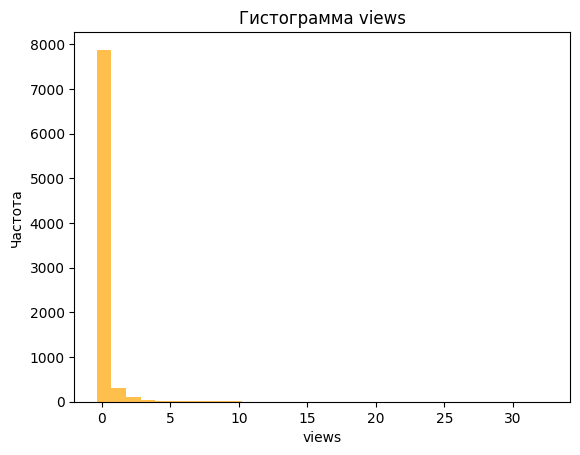

стреджс: 31
Проверка близости к нормальной выборке для year
P-value: 0.0000000000
D: 0.10849488788234163
1.3520089877196395e-86  >  0.05  | РЕЗУЛЬТАТ:  Не близка к нормальной


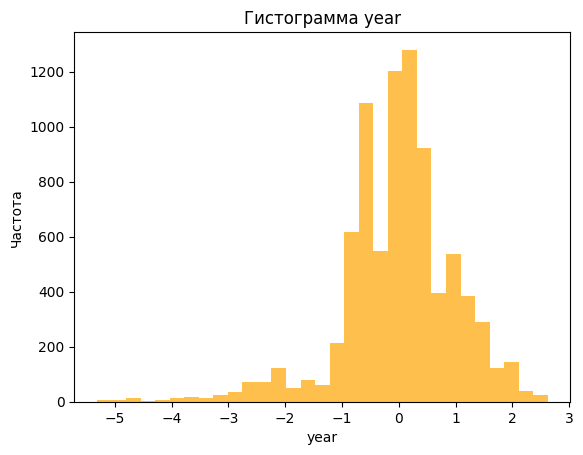

стреджс: 31
Проверка близости к нормальной выборке для seats_amount
P-value: 0.0000000000
D: 0.43471532128423646
0.0  >  0.05  | РЕЗУЛЬТАТ:  Не близка к нормальной


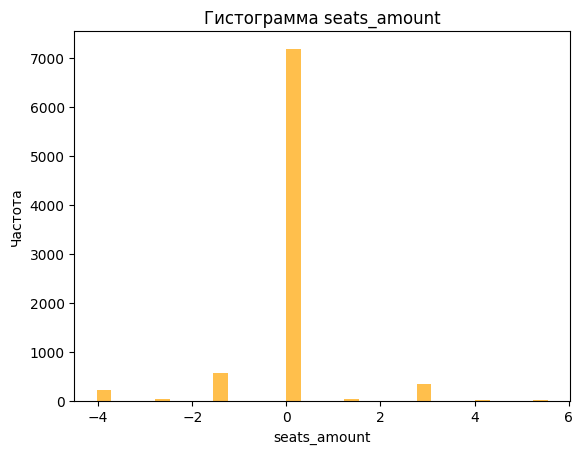

стреджс: 31
Проверка близости к нормальной выборке для horsepower
P-value: 0.0000000000
D: 0.10946416426904249
3.80685503682389e-88  >  0.05  | РЕЗУЛЬТАТ:  Не близка к нормальной


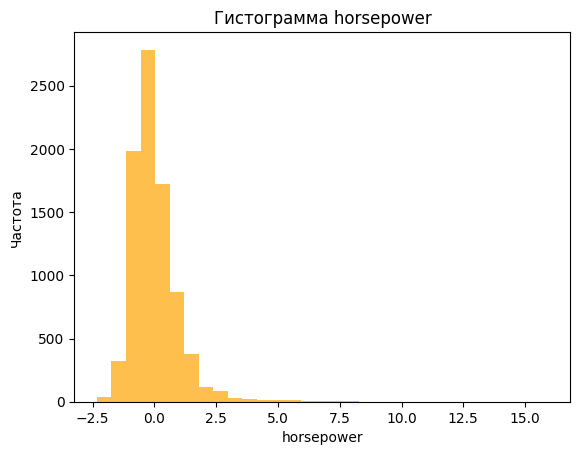

стреджс: 31
Проверка близости к нормальной выборке для car_mileage, km
P-value: 0.0000000000
D: 0.4987548175320986
0.0  >  0.05  | РЕЗУЛЬТАТ:  Не близка к нормальной


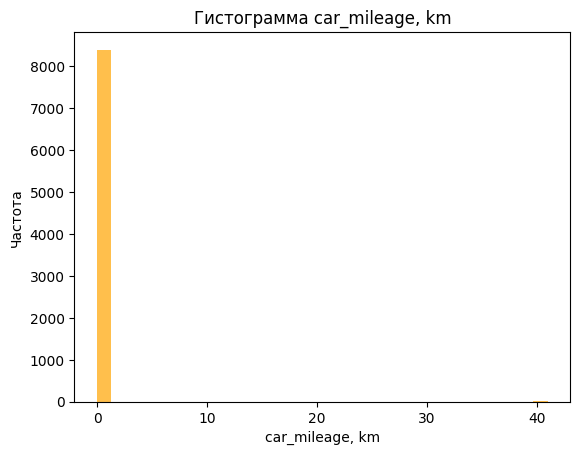

стреджс: 31
Проверка близости к нормальной выборке для engine_capacity, cc
P-value: 0.0000000000
D: 0.21155699165527142
0.0  >  0.05  | РЕЗУЛЬТАТ:  Не близка к нормальной


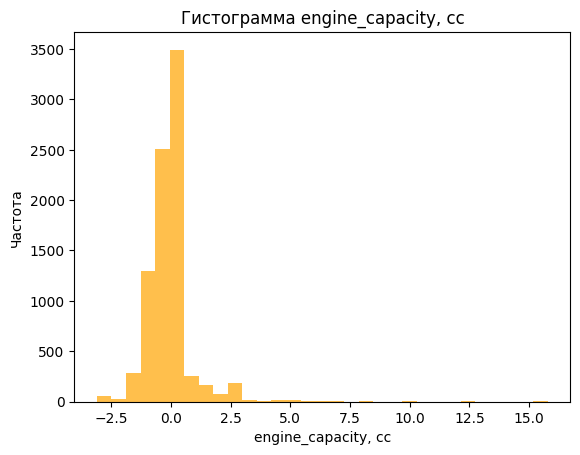

стреджс: 31
Проверка близости к нормальной выборке для price
P-value: 0.0000000000
D: 0.1994864596836325
1.4893474746375985e-293  >  0.05  | РЕЗУЛЬТАТ:  Не близка к нормальной


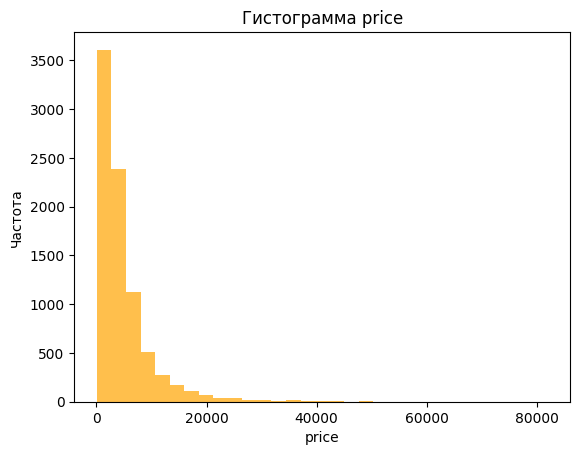

In [8]:
variables = data.columns

alpha = 0.05


for x in variables:
    sterdgess = math.floor(1 + 3.322*math.log(data_stats[x]['count']))
    print('стреджс: ' + str(sterdgess))
    
    D, p_value = stats.kstest(data[x], 'norm', args=(data_stats[x]['mean'], data_stats[x]['std']))
    
    print("Проверка близости к нормальной выборке для " + x)
    print("P-value: %.10f" % p_value)
    print("D: " + str(D))
    
    print(p_value, " > " , alpha, " | РЕЗУЛЬТАТ: ", ("Близка к нормальной" if (p_value > alpha) else "Не близка к нормальной"))
    
    plt.hist(data[x], bins=sterdgess, color="orange", alpha=0.7)  
    plt.xlabel(x)  
    plt.ylabel("Частота")  
    plt.title("Гистограмма " + x)  
    plt.show()

In [9]:

X = data[['horsepower', 'views', 'car_mileage, km', 'seats_amount', 'engine_capacity, cc', 'year']]
y = data['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data = data[(data != 0).all(axis=1)]

In [10]:
data.corr(method='spearman')

,views,year,seats_amount,horsepower,"car_mileage, km","engine_capacity, cc",price
views,1.000000,-0.187473,-0.052276,-0.086380,-0.031021,-0.026655,-0.239556
year,-0.187473,1.000000,-0.015279,0.284633,-0.223088,-0.029249,0.784955
seats_amount,-0.052276,-0.015279,1.000000,0.166869,0.172303,0.188250,-0.009826
horsepower,-0.086380,0.284633,0.166869,1.000000,0.209650,0.739561,0.511155
"car_mileage, km",-0.031021,-0.223088,0.172303,0.209650,1.000000,0.353191,-0.137329
"engine_capacity, cc",-0.026655,-0.029249,0.188250,0.739561,0.353191,1.000000,0.243359
price,-0.239556,0.784955,-0.009826,0.511155,-0.137329,0.243359,1.000000


In [11]:
data_without_price = data.drop(columns=['price'])
vif = pd.DataFrame()
vif["feature"] = data_without_price.columns
vif["VIF"] = [variance_inflation_factor(data_without_price.values, i) for i in range(data_without_price.shape[1])]

print(vif.round(2))

               feature   VIF
0                views  1.02
1                 year  1.14
2         seats_amount  1.03
3           horsepower  1.88
4      car_mileage, km  1.00
5  engine_capacity, cc  1.78


Теперь значения очень хорошие VIFi < 5

In [12]:
data.corr(method='spearman')

,views,year,seats_amount,horsepower,"car_mileage, km","engine_capacity, cc",price
views,1.000000,-0.187473,-0.052276,-0.086380,-0.031021,-0.026655,-0.239556
year,-0.187473,1.000000,-0.015279,0.284633,-0.223088,-0.029249,0.784955
seats_amount,-0.052276,-0.015279,1.000000,0.166869,0.172303,0.188250,-0.009826
horsepower,-0.086380,0.284633,0.166869,1.000000,0.209650,0.739561,0.511155
"car_mileage, km",-0.031021,-0.223088,0.172303,0.209650,1.000000,0.353191,-0.137329
"engine_capacity, cc",-0.026655,-0.029249,0.188250,0.739561,0.353191,1.000000,0.243359
price,-0.239556,0.784955,-0.009826,0.511155,-0.137329,0.243359,1.000000


In [13]:

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()

y_pred = model.predict(X_test)

print(model.summary())

for i in y_test:
    if i <= 0:
        print(i)

mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"MAPE: {mape:.2f}%")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     871.7
Date:                Thu, 09 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:16:27   Log-Likelihood:                -65626.
No. Observations:                6722   AIC:                         1.313e+05
Df Residuals:                    6715   BIC:                         1.313e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4807.0899    

In [14]:



ridge = Ridge(alpha=1.0) 

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print("R² на обучающей:", r2_score(y_train, y_pred_train))
print("R² на тестовой:", r2_score(y_test, y_pred_test))
print("RMSE на тестовой:", root_mean_squared_error(y_test, y_pred_test))

R² на обучающей: 0.4378420178763409
R² на тестовой: 0.4623952771602937
RMSE на тестовой: 4170.123691320406


In [15]:
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("MAPE: " + str(mape))

MAPE: 132.13116895248533


In [16]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

print(f"Было признаков: {X.shape[1]}")
print(f"Стало признаков: {X_pca.shape[1]}")
print(f"Объяснённая дисперсия: {pca.explained_variance_ratio_.sum():.2%}")

Было признаков: 6
Стало признаков: 6
Объяснённая дисперсия: 100.00%


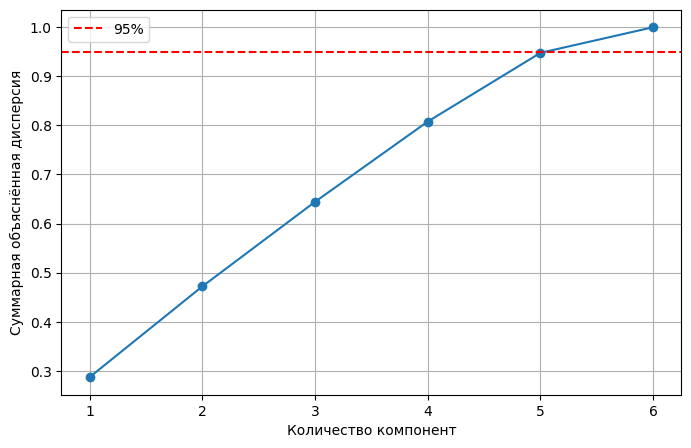

In [17]:
pca_full = PCA()
pca_full.fit(X)

cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumsum_var)+1), cumsum_var, marker='o')
plt.axhline(0.95, color='r', linestyle='--', label='95%')
plt.xlabel('Количество компонент')
plt.ylabel('Суммарная объяснённая дисперсия')
plt.legend()
plt.grid()
plt.show()

In [18]:

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

X_train_pca = sm.add_constant(X_train_pca)
X_test_pca = sm.add_constant(X_test_pca)

model = sm.OLS(y_train, X_train_pca).fit() 


y_pred_test = model.predict(X_test_pca)
y_pred_train = model.predict(X_train_pca)

In [19]:

mape = mean_absolute_percentage_error(y_test, y_pred_test) * 100

print(f"\nРезультаты модели на PCA-признаках:")
print("R² на обучающей:", r2_score(y_train, y_pred_train))
print("R² на тестовой:", r2_score(y_test, y_pred_test))
print("RMSE на тестовой:", root_mean_squared_error(y_test, y_pred_test))
print("RMSE на обучающей:", root_mean_squared_error(y_train, y_pred_train))
print("MAPE на тестовой:", mean_absolute_percentage_error(y_test, y_pred_test) * 100)
print("MAPE на обучающей:", mean_absolute_percentage_error(y_train, y_pred_train) * 100)

print(model.summary())


Результаты модели на PCA-признаках:
R² на обучающей: 0.43784202464965316
R² на тестовой: 0.4623992459515457
RMSE на тестовой: 4170.108298616186
RMSE на обучающей: 4204.607703847686
MAPE на тестовой: 132.13116895248533
MAPE на обучающей: 136.99608305758514
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     871.7
Date:                Thu, 09 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:16:28   Log-Likelihood:                -65626.
No. Observations:                6722   AIC:                         1.313e+05
Df Residuals:                    6715   BIC:                         1.313e+05
Df Model:                           6                                         
Covariance Type:            nonr

In [ ]:
ridge = Ridge(alpha=1.0)

ridge.fit(X_train_pca, y_train)

y_pred_train = ridge.predict(X_train_pca)
y_pred_test = ridge.predict(X_test_pca)

print("R² на обучающей:", r2_score(y_train, y_pred_train))
print("R² на тестовой:", r2_score(y_test, y_pred_test))
print("RMSE на тестовой:", root_mean_squared_error(y_test, y_pred_test))
mape = mean_absolute_percentage_error(y_test, y_pred_test) * 100
print("MAPE на тестовой:", str(mape)+ "%")

R² на обучающей: 0.4378420178763409
R² на тестовой: 0.4623952771602936
RMSE на тестовой: 4170.123691320406
MAPE на тестовой: 132.12450176624142%
